<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Food_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("train_fd.csv")
df_test = pd.read_csv("test_fd.csv")
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [188]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [189]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [190]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [191]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [192]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [193]:
train = pd.merge(df_train, center_info, on = 'center_id')
test = pd.merge(df_test, center_info, on = 'center_id')
train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [194]:
train = pd.merge(train, meal_info, on = 'meal_id')
train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


In [195]:
train['num_orders'].groupby(train['center_type'])

In [196]:
len(list(train['num_orders'].groupby(train['center_type'])))

3

In [197]:
np.mean(list(train['num_orders'].groupby(train['center_type']))[2][1])

206.6700972959947

In [198]:
train.groupby('center_type').agg({'num_orders':['sum', 'mean', lambda x: np.max(x) - np.min(x)]})

num_orders                     
                   sum        mean <lambda>
center_type                                
TYPE_A        68978517  262.394456    24286
TYPE_B        29996073  318.856145    13567
TYPE_C        20582895  206.670097    10111

In [199]:
test = pd.merge(test, meal_info, on = 'meal_id')
test.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


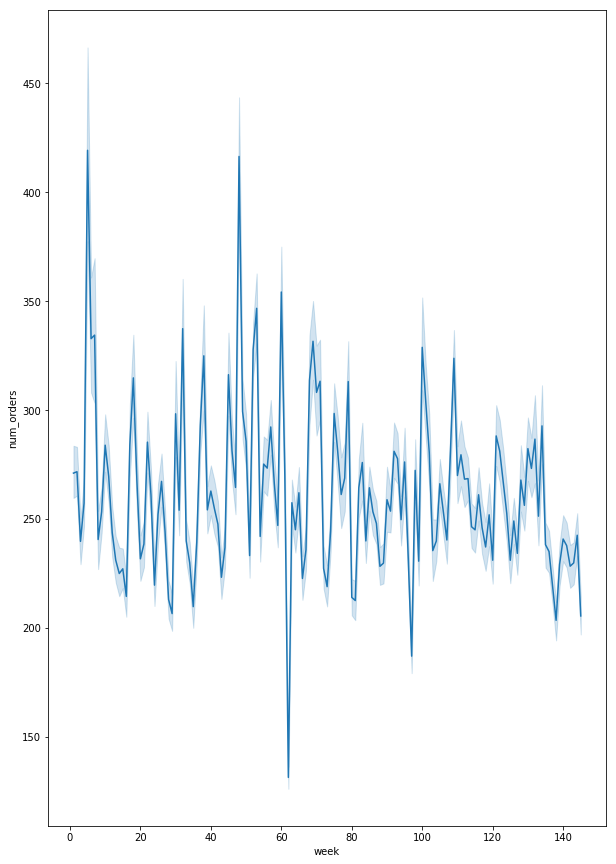

In [200]:
sns.lineplot(train['week'],train['num_orders']) # takes the mean of all num_orders in every week and plots the graph in confidence intervals

In [201]:
np.mean(train.loc[train['week'] == 3,'num_orders'])

239.82821662642291

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

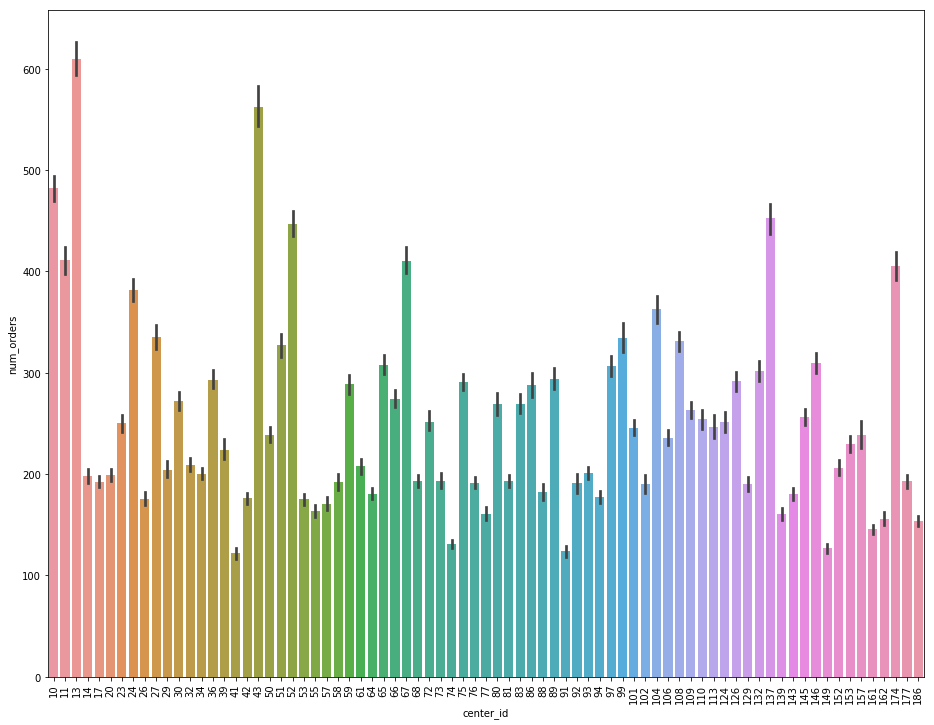

In [202]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,12.27
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

In [203]:
np.mean(train.loc[train['center_id'] == 13, 'num_orders'])

609.7849843883055

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

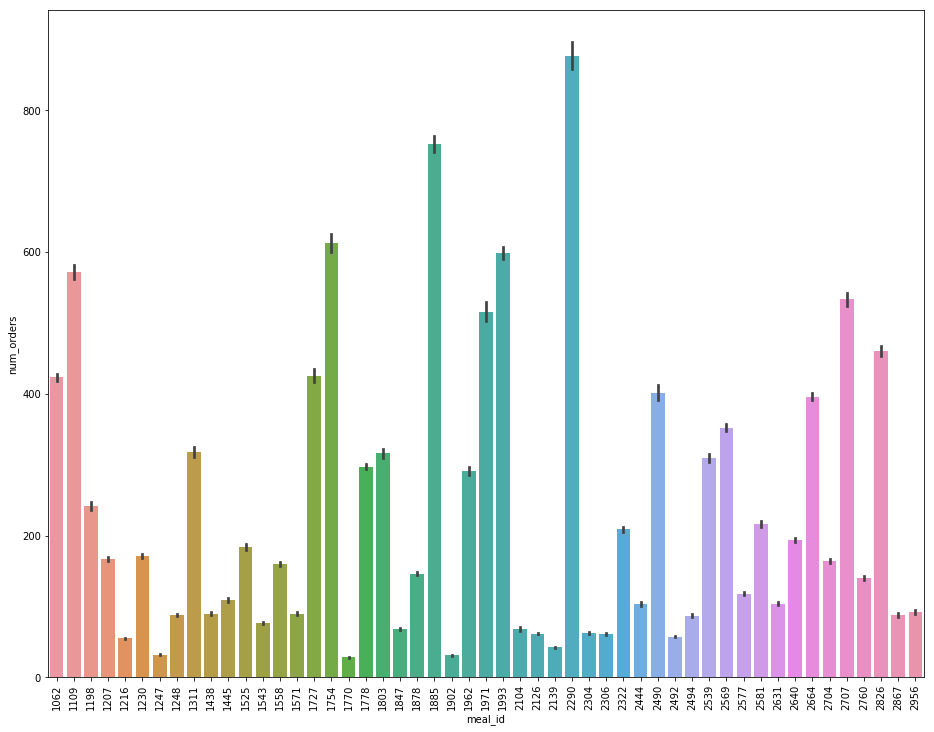

In [204]:
sns.barplot(train['meal_id'],train['num_orders'])
plt.xticks(rotation = 90)

In [205]:
np.mean(train.loc[train['meal_id'] == 1885, 'num_orders'])

752.4563649477101

In [206]:
train['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

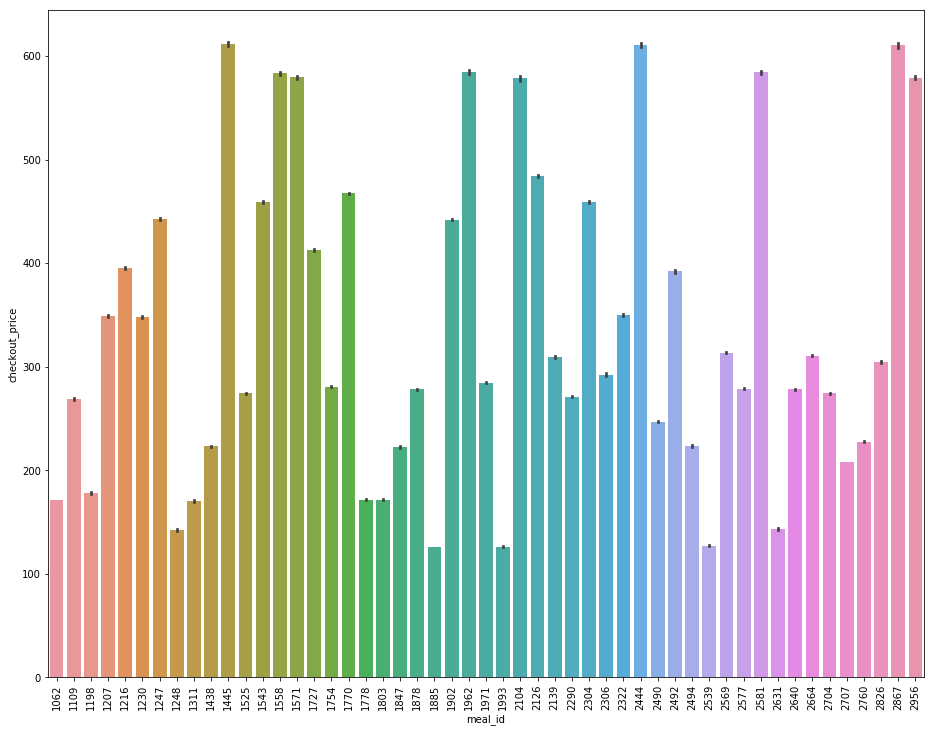

In [207]:
sns.barplot(train['meal_id'],train['checkout_price'])
plt.xticks(rotation = 90)

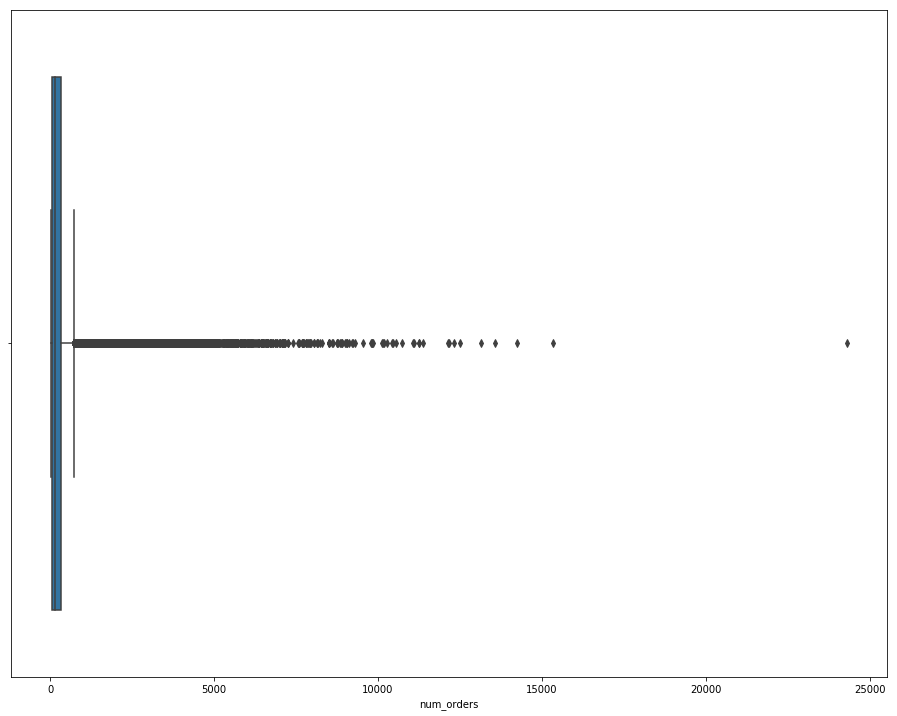

In [208]:
sns.boxplot(train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

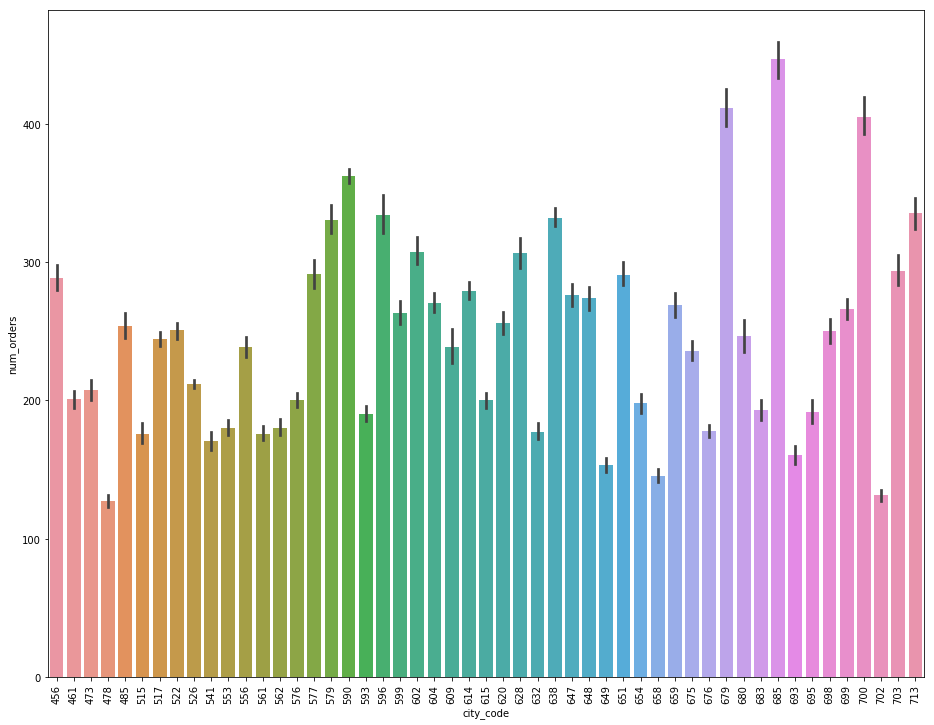

In [209]:
sns.barplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = 90)

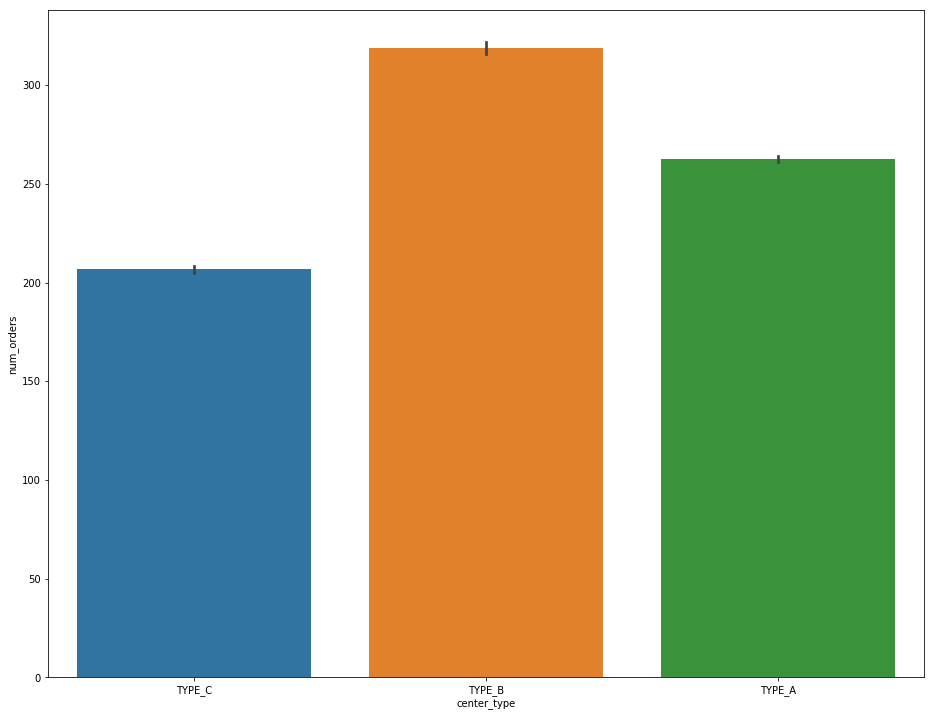

In [210]:
sns.barplot(train['center_type'],train['num_orders'])


In [211]:
train['category'].value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

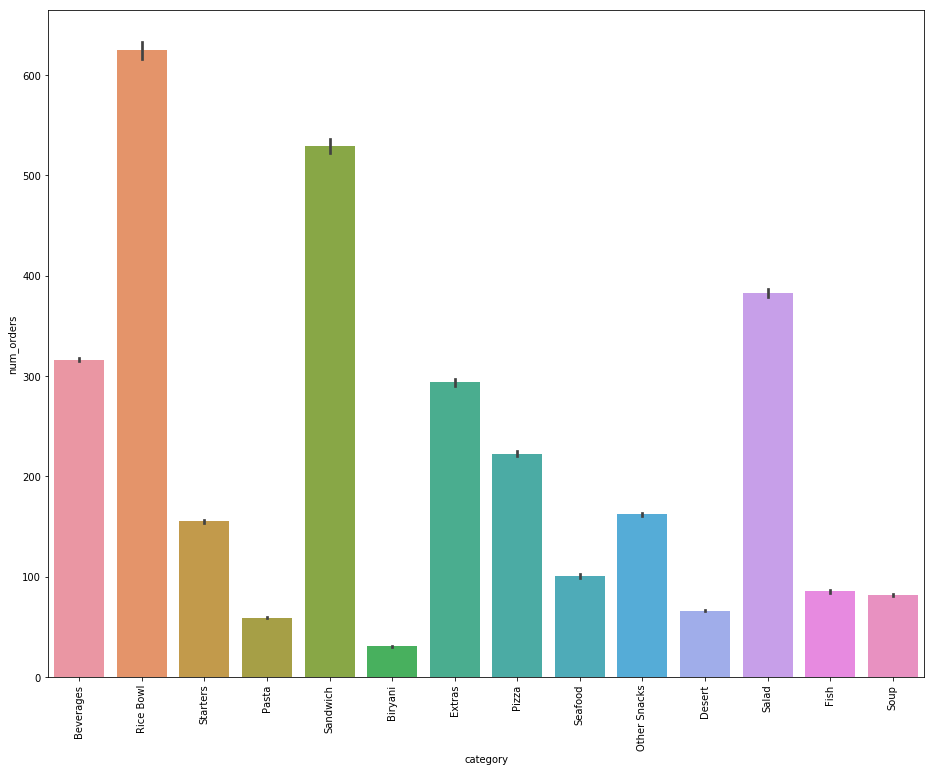

In [212]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = 90)

In [213]:
train['cuisine'].value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

In [214]:
train.groupby('cuisine').num_orders.agg(['mean'])

,mean
cuisine,
Continental,164.545348
Indian,229.039037
Italian,359.347830
Thai,276.423411


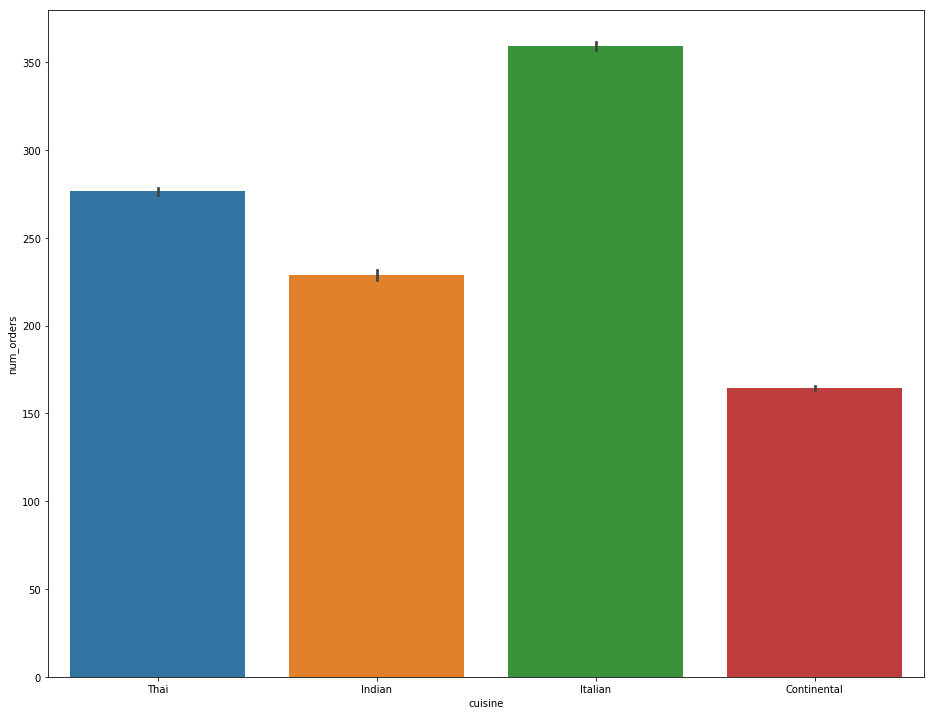

In [215]:
sns.barplot(train['cuisine'],train['num_orders'])

In [216]:
train['op_area'].unique()

array([2. , 3.6, 3.7, 5.3, 3.8, 6.7, 5.6, 3.9, 3.4, 5. , 2.8, 2.4, 4.8,
       4. , 4.6, 4.4, 4.5, 4.1, 0.9, 4.2, 2.9, 2.7, 4.7, 3.2, 3. , 7. ,
       1.9, 3.5, 6.3, 5.1])

In [0]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = 90)

In [0]:
train['region_code'].unique()

In [0]:
train.groupby('region_code').num_orders.agg({'mean'})

In [0]:
sns.barplot(train['region_code'],train['num_orders'])

In [0]:
train['emailer_for_promotion'].unique()

In [0]:
train.groupby('emailer_for_promotion').agg({'num_orders':['mean']})

In [0]:
sns.barplot(train['emailer_for_promotion'],train['num_orders'])

In [0]:
train['homepage_featured'].unique()

In [0]:
sns.barplot(train['homepage_featured'],train['num_orders'])

**Joint Distribution Plot** 

1.   Produces bivariate and univariate graphs
2.   You can draw histograms with scatter plot (default)


3.   Custom changes to be made to plot kernel density plots and regression
4.   Hexagonal pattern plots can also be obtained

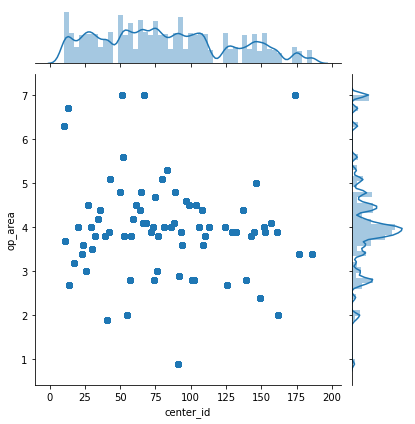

In [185]:
rcParams['figure.figsize'] = 10,15
sns.jointplot(train['center_id'], train['op_area'], kind = 'reg') 

In [0]:
sns.jointplot(train['checkout_price'], train['num_orders']) 

In [0]:
sns.jointplot(train['op_area'], train['num_orders'])

In [0]:
sns.jointplot(train['region_code'], train['num_orders'])

In [0]:
sns.jointplot(train['city_code'], train['num_orders'])

In [0]:
sns.boxplot('category','num_orders', data = train)